In [1]:
# import
import acutestrokeunit
from acutestrokeunit import Scenario, AcuteStrokeUnit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Check the simulation model within single run with the trace

# Turn on the TRACE, change collection period
acutestrokeunit.TRACE = True
acutestrokeunit.DEFAULT_RESULTS_COLLECTION_PERIOD = 20

# single run
default_args = Scenario()
model = AcuteStrokeUnit(default_args)
model.run()
summary = model.run_summary_frame()
print(summary)

1. patient 1, type 1 arrive at 0.604961
2. patient 1, type 1 waiting for bed ended 0.605; waiting time was 0.000
1. patient 2, type 1 arrive at 1.121632
2. patient 2, type 1 waiting for bed ended 1.122; waiting time was 0.000
1. patient 3, type 2 arrive at 1.981323
2. patient 3, type 2 waiting for bed ended 1.981; waiting time was 0.000
3. patient 3, type 2 staying in hospital ended 2.244; stay length was 0.263
3. patient 1, type 1 staying in hospital ended 2.985; stay length was 2.381
1. patient 4, type 3 arrive at 3.577657
2. patient 4, type 3 waiting for bed ended 3.578; waiting time was 0.000
1. patient 5, type 2 arrive at 4.027396
2. patient 5, type 2 waiting for bed ended 4.027; waiting time was 0.000
1. patient 6, type 1 arrive at 4.066287
2. patient 6, type 1 waiting for bed ended 4.066; waiting time was 0.000
3. patient 5, type 2 staying in hospital ended 4.940; stay length was 0.913
1. patient 7, type 1 arrive at 5.276983
2. patient 7, type 1 waiting for bed ended 5.277; wait

In [3]:
def distribution_plot(samples, bins=100):
    """
    helper function to visualise the distributions
    """
    hist = np.histogram(samples, bins=np.arange(bins), density=True)
    plt.plot(hist[0]);
    plt.ylabel('p(x)');
    plt.xlabel('x');

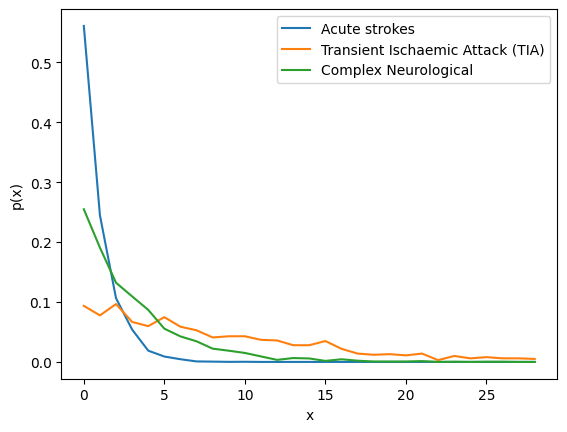

In [4]:
# Check if inter-arrival time follow the exponential distribution within single run
acutestrokeunit.TRACE = False
acutestrokeunit.DEFAULT_RESULTS_COLLECTION_PERIOD = 10000

# single run
default_args = Scenario()
model = AcuteStrokeUnit(default_args)
model.run()
raw_df = model.raw_summary()

# calculate inter-arrival time based on arrival time
samples = pd.concat((raw_df["patient_type"],
                   raw_df["arrival_time"] - raw_df.groupby(["patient_type"])["arrival_time"].shift(1)),
                   axis=1)
samples.dropna(inplace=True)

# plotting distribution
distribution_plot(samples[samples.iloc[:,0]==1]["arrival_time"], bins=30)
distribution_plot(samples[samples.iloc[:,0]==2]["arrival_time"], bins=30)
distribution_plot(samples[samples.iloc[:,0]==3]["arrival_time"], bins=30)
plt.legend(["Acute strokes","Transient Ischaemic Attack (TIA)","Complex Neurological"])

       patient_type  stay_in_hospital
0                 1          2.380529
1                 1         32.704413
2                 2          0.263024
3                 3          1.929229
4                 2          0.912809
...             ...               ...
12221             1          2.781592
12222             1          2.264053
12223             1          3.087032
12224             3          1.009036
12225             2          0.669245

[12226 rows x 2 columns]


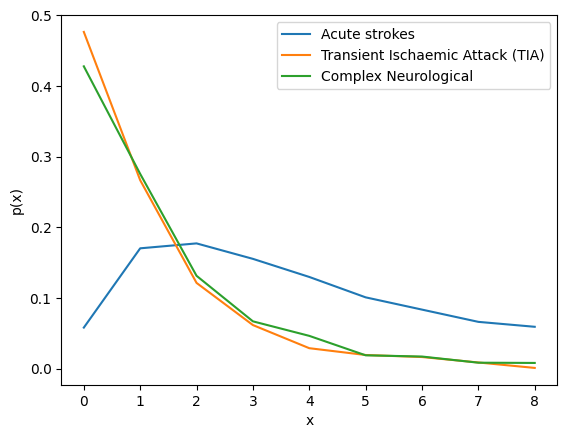

In [5]:
# Check if stay length follow the log-normal distribution within single run

# calculate inter-arrival time based on arrival time
samples = raw_df[["patient_type", "stay_in_hospital"]]
print(samples)

# plotting distribution
distribution_plot(samples[samples.iloc[:,0]==1]["stay_in_hospital"], bins=10)
distribution_plot(samples[samples.iloc[:,0]==2]["stay_in_hospital"], bins=10)
distribution_plot(samples[samples.iloc[:,0]==3]["stay_in_hospital"], bins=10)
plt.legend(["Acute strokes","Transient Ischaemic Attack (TIA)","Complex Neurological"])

In [6]:
# Check 10% increase is 10% in number of patients with in single run

# rise for 10%
acutestrokeunit.TRACE = False
acutestrokeunit.DEFAULT_RESULTS_COLLECTION_PERIOD = 10000
acutestrokeunit.MEAN_IAT1 /= 1.1
acutestrokeunit.MEAN_IAT2 /= 1.1
acutestrokeunit.MEAN_IAT3 /= 1.1

# single run
default_args = Scenario()
model = AcuteStrokeUnit(default_args)
model.run()
raw_df_increase = model.raw_summary()
raw_df.groupby(["patient_type"])["patient_id"].count()

patient_type
1    8238
2    1052
3    2936
Name: patient_id, dtype: int64

In [7]:
raw_df_increase.groupby(["patient_type"])["patient_id"].count()

patient_type
1    9062
2    1151
3    3210
Name: patient_id, dtype: int64